1.15.2
Predicted label is ['military uniform' 'bow tie' 'suit' 'bearskin' 'pickelhaube'].


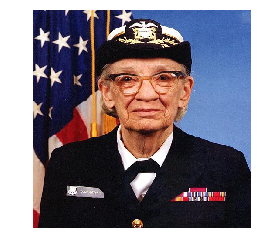

In [6]:
import boto3
import json
import sagemaker
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
import tempfile
import os
#----------------------save model-------------------------------------------
print(tf.version.VERSION)
file = tf.keras.utils.get_file(
    "grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)

x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
'''
pretrained_model = tf.keras.applications.MobileNet()
result_before_save = pretrained_model(x)

#decoded = imagenet_labels[np.argsort(result_before_save)[0,::-1][:5]+1]
#print("Result before saving:\n", decoded)
mobilenet_save_path = os.path.join('./export/Servo', "1/")
print(mobilenet_save_path)
tf.saved_model.save(pretrained_model, mobilenet_save_path)
#----------------------------compress saved model------------------------------
import tarfile
#create file name
tar = tarfile.open("./model.tar.gz","w:gz")
#read and compress files
for root,dir,files in os.walk("export"):
    for file in files:
        fullpath = os.path.join(root,file)
        tar.add(fullpath)
tar.close()
'''
#------------------------------prediction--------------------------------------
'''
from sagemaker.tensorflow.model import TensorFlowPredictor
sagemaker_session = sagemaker.Session()
predictor = TensorFlowPredictor('sagemaker-test-endpoint57',sagemaker_session)
x = np.expand_dims(x,axis=0)
response = predictor.predict(x)
'''

x = np.expand_dims(x,axis=0)
data = json.dumps({"signature_name": "serving_default",
                   "instances": x.tolist()})
runtime_client = boto3.client('runtime.sagemaker')
response = runtime_client.invoke_endpoint(EndpointName = 'sagemaker-test-endpoint59',
                                         ContentType = 'application/json',
                                         Body = data)

result = response['Body'].read().decode('ascii')
result = json.loads(result)
predict_output = result['predictions']
decoded = imagenet_labels[np.argsort(predict_output)[0,::-1][:5]+1]
print('Predicted label is {}.'.format(decoded))
